<a href="https://colab.research.google.com/github/cgree136/D3/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


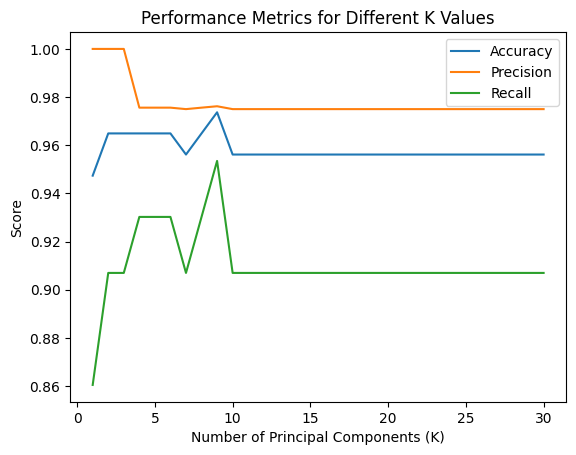

Accuracy of SVM with linear kernel: 0.956140350877193
Accuracy of SVM with polynomial kernel: 0.9473684210526315
Accuracy of SVM with RBF kernel: 0.9473684210526315
Accuracy of Logistic Regression: 0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
#PROBLEM 1
# Step 1: Importing the Required Libraries and Loading the Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Load the breast cancer dataset
from google.colab import drive
drive.mount('/content/drive')

path ="/content/drive/MyDrive/cancer.csv"
data = pd.read_csv(path)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 2: Finding the Optimum Number of Principal Components (K)
max_components = min(X.shape[0], X.shape[1])
K_values = np.arange(1, X.shape[1] )
accuracy_scores = []

# Iterate over different K values
for K in K_values:
    # Apply PCA with K components
    pca = PCA(n_components=K, svd_solver='full')  # Specify svd_solver
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train an SVM classifier with a linear kernel
    svm = SVC(kernel='linear')
    svm.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test_pca)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


# Find the optimum number of principal components (K)
optimum_K = K_values[np.argmax(accuracy_scores)]

# Step 3: Plotting Classification Accuracy, Precision, and Recall for Different K Values
precision_scores = []
recall_scores = []

# Iterate over different K values again
for K in K_values:
    # Apply PCA with K components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train an SVM classifier with a linear kernel
    svm = SVC(kernel='linear')
    svm.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test_pca)

    # Calculate precision and recall scores
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store the scores
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot the accuracy, precision, and recall scores against the number of principal components (K)
plt.plot(K_values, accuracy_scores, label='Accuracy')
plt.plot(K_values, precision_scores, label='Precision')
plt.plot(K_values, recall_scores, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics for Different K Values')
plt.legend()
plt.show()

# Step 4: Exploring Different Kernel Tricks and Comparing with Logistic Regression
kernel_names = ['linear', 'poly', 'rbf']
svm_accuracies = []

# Iterate over different kernel tricks
for kernel in kernel_names:
    # Train an SVM classifier with the current kernel
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies.append(accuracy)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set using logistic regression
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy of logistic regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Print the accuracies of the SVM classifiers and the logistic regression model
print("Accuracy of SVM with linear kernel:", svm_accuracies[0])
print("Accuracy of SVM with polynomial kernel:", svm_accuracies[1])
print("Accuracy of SVM with RBF kernel:", svm_accuracies[2])
print("Accuracy of Logistic Regression:", logreg_accuracy)


MSE (RBF Kernel): 5562742259294.644
MSE (Linear Kernel): 3320924388700.8096
MSE (Polynomial Kernel): 5183764896367.932


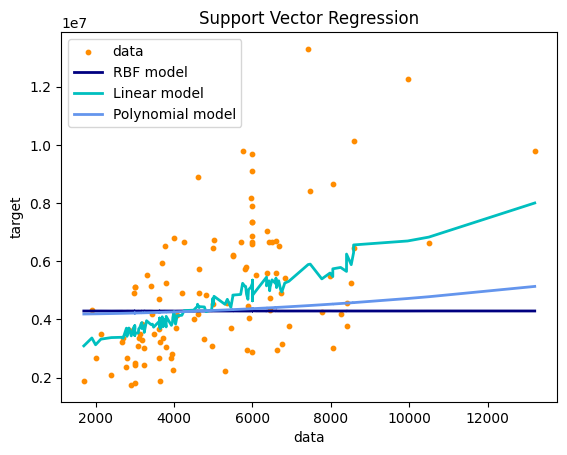

In [18]:
#PROBLEM 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.DataFrame({
    'price': [13300000,	12250000,	12250000,	12215000,	11410000,	10850000,	10150000,	10150000,	9870000,	9800000,	9800000,	9681000,	9310000,	9240000,	9240000,	9100000,	9100000,	8960000,	8890000,	8855000,	8750000,	8680000,	8645000,	8645000,	8575000,	8540000,	8463000,	8400000,	8400000,	8400000,	8400000,	8400000,	8295000,	8190000,	8120000,	8080940,	8043000,	7980000,	7962500,	7910000,	7875000,	7840000,	7700000,	7700000,	7560000,	7560000,	7525000,	7490000,	7455000,	7420000,	7420000,	7420000,	7350000,	7350000,	7350000,	7350000,	7343000,	7245000,	7210000,	7210000,	7140000,	7070000,	7070000,	7035000,	7000000,	6930000,	6930000,	6895000,	6860000,	6790000,	6790000,	6755000,	6720000,	6685000,	6650000,	6650000,	6650000,	6650000,	6650000,	6650000,	6629000,	6615000,	6615000,	6580000,	6510000,	6510000,	6510000,	6475000,	6475000,	6440000,	6440000,	6419000,	6405000,	6300000,	6300000,	6300000,	6300000,	6300000,	6293000,	6265000,	6230000,	6230000,	6195000,	6195000,	6195000,	6160000,	6160000,	6125000,	6107500,	6090000,	6090000,	6090000,	6083000,	6083000,	6020000,	6020000,	6020000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5943000,	5880000,	5880000,	5873000,	5873000,	5866000,	5810000,	5810000,	5810000,	5803000,	5775000,	5740000,	5740000,	5740000,	5740000,	5740000,	5652500,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5565000,	5565000,	5530000,	5530000,	5530000,	5523000,	5495000,	5495000,	5460000,	5460000,	5460000,	5460000,	5425000,	5390000,	5383000,	5320000,	5285000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5243000,	5229000,	5215000,	5215000,	5215000,	5145000,	5145000,	5110000,	5110000,	5110000,	5110000,	5075000,	5040000,	5040000,	5040000,	5040000,	5033000,	5005000,	4970000,	4970000,	4956000,	4935000,	4907000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4893000,	4893000,	4865000,	4830000,	4830000,	4830000,	4830000,	4795000,	4795000,	4767000,	4760000,	4760000,	4760000,	4753000,	4690000,	4690000,	4690000,	4690000,	4690000,	4690000,	4655000,	4620000,	4620000,	4620000,	4620000,	4620000,	4613000,	4585000,	4585000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4543000,	4543000,	4515000,	4515000,	4515000,	4515000,	4480000,	4480000,	4480000,	4480000,	4480000,	4473000,	4473000,	4473000,	4445000,	4410000,	4410000,	4403000,	4403000,	4403000,	4382000,	4375000,	4340000,	4340000,	4340000,	4340000,	4340000,	4319000,	4305000,	4305000,	4277000,	4270000,	4270000,	4270000,	4270000,	4270000,	4270000,	4235000,	4235000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4193000,	4193000,	4165000,	4165000,	4165000,	4130000,	4130000,	4123000,	4098500,	4095000,	4095000,	4095000,	4060000,	4060000,	4060000,	4060000,	4060000,	4025000,	4025000,	4025000,	4007500,	4007500,	3990000,	3990000,	3990000,	3990000,	3990000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3885000,	3885000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3836000,	3815000,	3780000,	3780000,	3780000,	3780000,	3780000,	3780000,	3773000,	3773000,	3773000,	3745000,	3710000,	3710000,	3710000,	3710000,	3710000,	3703000,	3703000,	3675000,	3675000,	3675000,	3675000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3633000,	3605000,	3605000,	3570000,	3570000,	3570000,	3570000,	3535000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3493000,	3465000,	3465000,	3465000,	3430000,	3430000,	3430000,	3430000,	3430000,	3430000,	3423000,	3395000,	3395000,	3395000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3353000,	3332000,	3325000,	3325000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3255000,	3255000,	3234000,	3220000,	3220000,	3220000,	3220000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3143000,	3129000,	3118850,	3115000,	3115000,	3115000,	3087000,	3080000,	3080000,	3080000,	3080000,	3045000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3003000,	2975000,	2961000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2870000,	2870000,	2870000,	2870000,	2852500,	2835000,	2835000,	2835000,	2800000,	2800000,	2730000,	2730000,	2695000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2653000,	2653000,	2604000,	2590000,	2590000,	2590000,	2520000,	2520000,	2520000,	2485000,	2485000,	2450000,	2450000,	2450000,	2450000,	2450000,	2450000,	2408000,	2380000,	2380000,	2380000,	2345000,	2310000,	2275000,	2275000,	2275000,	2240000,	2233000,	2135000,	2100000,	2100000,	2100000,	1960000,	1890000,	1890000,	1855000,	1820000,	1767150,	1750000,	1750000,	1750000],
    'area': [7420,	8960,	9960,	7500,	7420,	7500,	8580,	16200,	8100,	5750,	13200,	6000,	6550,	3500,	7800,	6000,	6600,	8500,	4600,	6420,	4320,	7155,	8050,	4560,	8800,	6540,	6000,	8875,	7950,	5500,	7475,	7000,	4880,	5960,	6840,	7000,	7482,	9000,	6000,	6000,	6550,	6360,	6480,	6000,	6000,	6000,	6000,	6600,	4300,	7440,	7440,	6325,	6000,	5150,	6000,	6000,	11440,	9000,	7680,	6000,	6000,	8880,	6240,	6360,	11175,	8880,	13200,	7700,	6000,	12090,	4000,	6000,	5020,	6600,	4040,	4260,	6420,	6500,	5700,	6000,	6000,	4000,	10500,	6000,	3760,	8250,	6670,	3960,	7410,	8580,	5000,	6750,	4800,	7200,	6000,	4100,	9000,	6400,	6600,	6000,	6600,	5500,	5500,	6350,	5500,	4500,	5450,	6420,	3240,	6615,	6600,	8372,	4300,	9620,	6800,	8000,	6900,	3700,	6420,	7020,	6540,	7231,	6254,	7320,	6525,	15600,	7160,	6500,	5500,	11460,	4800,	5828,	5200,	4800,	7000,	6000,	5400,	4640,	5000,	6360,	5800,	6660,	10500,	4800,	4700,	5000,	10500,	5500,	6360,	6600,	5136,	4400,	5400,	3300,	3650,	6100,	6900,	2817,	7980,	3150,	6210,	6100,	6600,	6825,	6710,	6450,	7800,	4600,	4260,	6540,	5500,	10269,	8400,	5300,	3800,	9800,	8520,	6050,	7085,	3180,	4500,	7200,	3410,	7980,	3000,	3000,	11410,	6100,	5720,	3540,	7600,	10700,	6600,	4800,	8150,	4410,	7686,	2800,	5948,	4200,	4520,	4095,	4120,	5400,	4770,	6300,	5800,	3000,	2970,	6720,	4646,	12900,	3420,	4995,	4350,	4160,	6040,	6862,	4815,	7000,	8100,	3420,	9166,	6321,	10240,	6440,	5170,	6000,	3630,	9667,	5400,	4320,	3745,	4160,	3880,	5680,	2870,	5010,	4510,	4000,	3840,	3760,	3640,	2550,	5320,	5360,	3520,	8400,	4100,	4990,	3510,	3450,	9860,	3520,	4510,	5885,	4000,	8250,	4040,	6360,	3162,	3510,	3750,	3968,	4900,	2880,	4880,	4920,	4950,	3900,	4500,	1905,	4075,	3500,	6450,	4032,	4400,	10360,	3400,	6360,	6360,	4500,	2175,	4360,	7770,	6650,	2787,	5500,	5040,	5850,	2610,	2953,	2747,	4410,	4000,	2325,	4600,	3640,	5800,	7000,	4079,	3520,	2145,	4500,	8250,	3450,	4840,	4080,	4046,	4632,	5985,	6060,	3600,	3680,	4040,	5600,	5900,	4992,	4340,	3000,	4320,	3630,	3460,	5400,	4500,	3460,	4100,	6480,	4500,	3960,	4050,	7260,	5500,	3000,	3290,	3816,	8080,	2145,	3780,	3180,	5300,	3180,	7152,	4080,	3850,	2015,	2176,	3350,	3150,	4820,	3420,	3600,	5830,	2856,	8400,	8250,	2520,	6930,	3480,	3600,	4040,	6020,	4050,	3584,	3120,	5450,	3630,	3630,	5640,	3600,	4280,	3570,	3180,	3000,	3520,	5960,	4130,	2850,	2275,	3520,	4500,	4000,	3150,	4500,	4500,	3640,	3850,	4240,	3650,	4600,	2135,	3036,	3990,	7424,	3480,	3600,	3640,	5900,	3120,	7350,	3512,	9500,	5880,	12944,	4900,	3060,	5320,	2145,	4000,	3185,	3850,	2145,	2610,	1950,	4040,	4785,	3450,	3640,	3500,	4960,	4120,	4750,	3720,	3750,	3100,	3185,	2700,	2145,	4040,	4775,	2500,	3180,	6060,	3480,	3792,	4040,	2145,	5880,	4500,	3930,	3640,	4370,	2684,	4320,	3120,	3450,	3986,	3500,	4095,	1650,	3450,	6750,	9000,	3069,	4500,	5495,	2398,	3000,	3850,	3500,	8100,	4960,	2160,	3090,	4500,	3800,	3090,	3240,	2835,	4600,	5076,	3750,	3630,	8050,	4352,	3000,	5850,	4960,	3600,	3660,	3480,	2700,	3150,	6615,	3040,	3630,	6000,	5400,	5200,	3300,	4350,	2640,	2650,	3960,	6800,	4000,	4000,	3934,	2000,	3630,	2800,	2430,	3480,	4000,	3185,	4000,	2910,	3600,	4400,	3600,	2880,	3180,	3000,	4400,	3000,	3210,	3240,	3000,	3500,	4840,	7700,	3635,	2475,	2787,	3264,	3640,	3180,	1836,	3970,	3970,	1950,	5300,	3000,	2400,	3000,	3360,	3420,	1700,	3649,	2990,	3000,	2400,	3620,	2910,	3850],
    'bedrooms': [4,	4,	3,	4,	4,	3,	4,	5,	4,	3,	3,	4,	4,	4,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	5,	4,	3,	3,	4,	3,	5,	3,	3,	4,	3,	4,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	4,	4,	4,	3,	3,	2,	4,	4,	3,	3,	2,	3,	3,	4,	3,	4,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	5,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	3,	4,	3,	4,	4,	3,	3,	6,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	4,	4,	5,	4,	3,	2,	3,	3,	4,	3,	4,	5,	3,	3,	3,	3,	4,	3,	3,	4,	3,	4,	3,	3,	3,	3,	2,	4,	4,	3,	3,	3,	4,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	2,	3,	2,	2,	4,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	2,	4,	3,	3,	2,	3,	3,	3,	3,	3,	4,	4,	2,	3,	3,	3,	2,	3,	4,	4,	2,	3,	2,	2,	3,	2,	3,	4,	2,	3,	3,	3,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	2,	4,	3,	3,	3,	2,	4,	2,	3,	3,	3,	2,	3,	3,	2,	3,	2,	3,	3,	3,	4,	3,	3,	5,	3,	4,	4,	2,	2,	2,	3,	2,	2,	2,	3,	4,	2,	3,	3,	3,	3,	2,	4,	3,	4,	2,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	2,	3,	3,	2,	2,	4,	3,	3,	4,	3,	3,	3,	3,	3,	4,	4,	3,	3,	3,	2,	3,	4,	3,	2,	2,	3,	4,	2,	4,	5,	2,	3,	2,	2,	3,	2,	3,	2,	3,	2,	2,	2,	3,	2,	3,	5,	4,	2,	3,	2,	3,	2,	2,	3,	2,	2,	2,	2,	2,	2,	3,	3,	2,	2,	3,	3,	3,	3,	3,	2,	2,	3,	4,	2,	2,	3,	3,	3,	4,	3,	3,	3,	3,	3,	6,	2,	2,	3,	2,	2,	3,	2,	3,	3,	3,	2,	3,	2,	2,	3,	3,	3,	3,	2,	3,	3,	2,	4,	4,	2,	2,	2,	3,	3,	2,	3,	3,	2,	4,	2,	4,	3,	4,	4,	2,	3,	3,	2,	2,	4,	3,	2,	3,	3,	1,	2,	2,	2,	3,	3,	2,	3,	2,	3,	3,	3,	3,	3,	2,	2,	2,	3,	2,	2,	2,	3,	3,	2,	2,	3,	3,	4,	2,	4,	2,	3,	2,	3,	4,	3,	2,	3,	3,	2,	2,	2,	4,	4,	3,	3,	2,	3,	3,	2,	3,	2,	2,	2,	3,	3,	3,	2,	3,	2,	3,	2,	2,	2,	2,	3,	3,	2,	3,	3,	3,	2,	2,	2,	2,	2,	2,	3,	4,	2,	2,	2,	2,	1,	3,	3,	3,	2,	3,	4,	2,	5,	3,	2,	2,	2,	3,	2,	3,	3],
    'bathrooms': [2,	4,	2,	2,	1,	3,	3,	3,	1,	2,	1,	3,	2,	2,	2,	1,	2,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	3,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	1,	2,	2,	2,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	1,	3,	1,	1,	2,	2,	2,	2,	1,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	2,	2,	2,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	2,	1,	1,	1,	3,	2,	2,	1,	2,	1,	2,	1,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	1,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	3,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	2,	1,	1,	1,	1,	1,	2,	1,	2,	2,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1],
    'stories': [3,	4,	2,	2,	2,	1,	4,	2,	2,	4,	2,	2,	2,	2,	2,	2,	2,	4,	2,	2,	2,	1,	1,	2,	2,	2,	4,	1,	2,	2,	4,	4,	2,	2,	2,	4,	3,	4,	4,	4,	2,	4,	4,	4,	4,	3,	4,	4,	2,	1,	4,	4,	4,	4,	2,	2,	2,	4,	4,	4,	2,	1,	2,	3,	1,	2,	1,	1,	1,	2,	2,	4,	4,	4,	2,	2,	3,	3,	1,	3,	2,	2,	1,	4,	2,	3,	3,	1,	1,	2,	2,	1,	4,	1,	4,	3,	1,	1,	3,	3,	1,	3,	4,	3,	1,	4,	1,	3,	3,	2,	1,	3,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	4,	1,	1,	3,	3,	3,	1,	4,	3,	3,	1,	4,	2,	2,	3,	1,	4,	2,	2,	3,	2,	4,	1,	2,	3,	1,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	4,	3,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	2,	2,	2,	1,	2,	1,	1,	1,	2,	3,	1,	2,	1,	2,	1,	1,	3,	1,	2,	1,	2,	4,	2,	1,	2,	1,	1,	4,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	2,	1,	4,	1,	2,	3,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	3,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	2,	1,	1,	3,	2,	3,	1,	1,	2,	2,	2,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	3,	2,	2,	1,	1,	2,	2,	1,	2,	2,	2,	2,	1,	2,	2,	1,	1,	1,	1,	2,	2,	2,	1,	2,	1,	1,	2,	2,	2,	1,	2,	2,	1,	1,	3,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	2,	2,	1,	2,	2,	2,	3,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	3,	1,	1,	1,	3,	2,	2,	1,	2,	1,	1,	2,	3,	2,	1,	1,	1,	2,	1,	1,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	1,	1,	1,	2,	2,	1,	2,	1,	2,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	1,	1,	1,	2,	3,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	2],
    'parking': [2,	3,	2,	3,	2,	2,	2,	0,	2,	1,	2,	2,	1,	2,	0,	2,	1,	2,	2,	1,	2,	2,	1,	1,	2,	2,	0,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	0,	0,	2,	2,	1,	0,	1,	3,	1,	0,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	0,	0,	0,	0,	1,	0,	0,	0,	2,	0,	1,	1,	1,	0,	2,	0,	0,	2,	2,	2,	0,	2,	0,	3,	1,	2,	1,	1,	0,	0,	0,	1,	1,	0,	2,	0,	0,	0,	1,	1,	2,	2,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	1,	0,	1,	2,	2,	0,	1,	2,	0,	0,	0,	0,	2,	0,	2,	1,	0,	2,	0,	1,	1,	0,	1,	0,	1,	1,	0,	0,	0,	2,	0,	0,	2,	2,	0,	1,	2,	0,	0,	0,	0,	0,	1,	0,	2,	2,	0,	0,	0,	1,	2,	0,	1,	2,	2,	0,	2,	2,	2,	1,	0,	1,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	2,	0,	1,	0,	1,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	0,	2,	0,	2,	1,	2,	3,	0,	1,	2,	1,	0,	0,	0,	0,	2,	1,	0,	0,	0,	1,	1,	2,	0,	0,	0,	2,	0,	3,	0,	0,	0,	1,	0,	0,	2,	1,	2,	0,	1,	1,	1,	0,	0,	0,	0,	0,	2,	1,	0,	0,	1,	0,	2,	2,	0,	0,	1,	1,	2,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	2,	0,	0,	0,	1,	0,	0,	1,	0,	2,	3,	0,	0,	1,	0,	3,	1,	1,	2,	1,	0,	0,	1,	0,	0,	1,	0,	1,	2,	0,	2,	2,	2,	1,	3,	0,	0,	0,	1,	0,	0,	0,	3,	0,	0,	1,	2,	2,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	2,	0,	1,	2,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	3,	0,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	0,	1,	2,	0,	2,	0,	0,	0,	0,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	2,	0,	0,	0,	2,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	3,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	2,	0,	0,	0,	0],
    'mainroad': [1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1],
    'guestroom': [0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'basement': [0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0],
    'hotwaterheating': [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'aircondition': [1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'prefarea': [1,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    })
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'aircondition', 'prefarea']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Fit SVR models on the training data
svr_rbf.fit(X_train, y_train)
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

# Make predictions on the test data
y_rbf_pred = svr_rbf.predict(X_test)
y_lin_pred = svr_lin.predict(X_test)
y_poly_pred = svr_poly.predict(X_test)

# Evaluate the models using Mean Squared Error
mse_rbf = mean_squared_error(y_test, y_rbf_pred)
mse_lin = mean_squared_error(y_test, y_lin_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)

print("MSE (RBF Kernel):", mse_rbf)
print("MSE (Linear Kernel):", mse_lin)
print("MSE (Polynomial Kernel):", mse_poly)


# Sort the 'area' values and store the corresponding SVR predictions
sorted_area = np.sort(X_test['area'])
sorted_indices = X_test['area'].argsort()
y_rbf_pred_sorted = svr_rbf.predict(X_test.iloc[sorted_indices])
y_lin_pred_sorted = svr_lin.predict(X_test.iloc[sorted_indices])
y_poly_pred_sorted = svr_poly.predict(X_test.iloc[sorted_indices])

# Create a scatter plot to visualize the actual vs. predicted values for 'area'.
plt.scatter(sorted_area, y_test.iloc[sorted_indices], color='darkorange', label='data', s=10)
plt.plot(sorted_area, y_rbf_pred_sorted, color='navy', label='RBF model', linewidth=2)
plt.plot(sorted_area, y_lin_pred_sorted, color='c', label='Linear model', linewidth=2)
plt.plot(sorted_area, y_poly_pred_sorted, color='cornflowerblue', label='Polynomial model', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

MSE (Linear Kernel with PCA): 3761683123093.2935
MSE (RBF Kernel with PCA): 5558687030124.764
MSE (Poly Kernel with PCA): 5445414919437.405


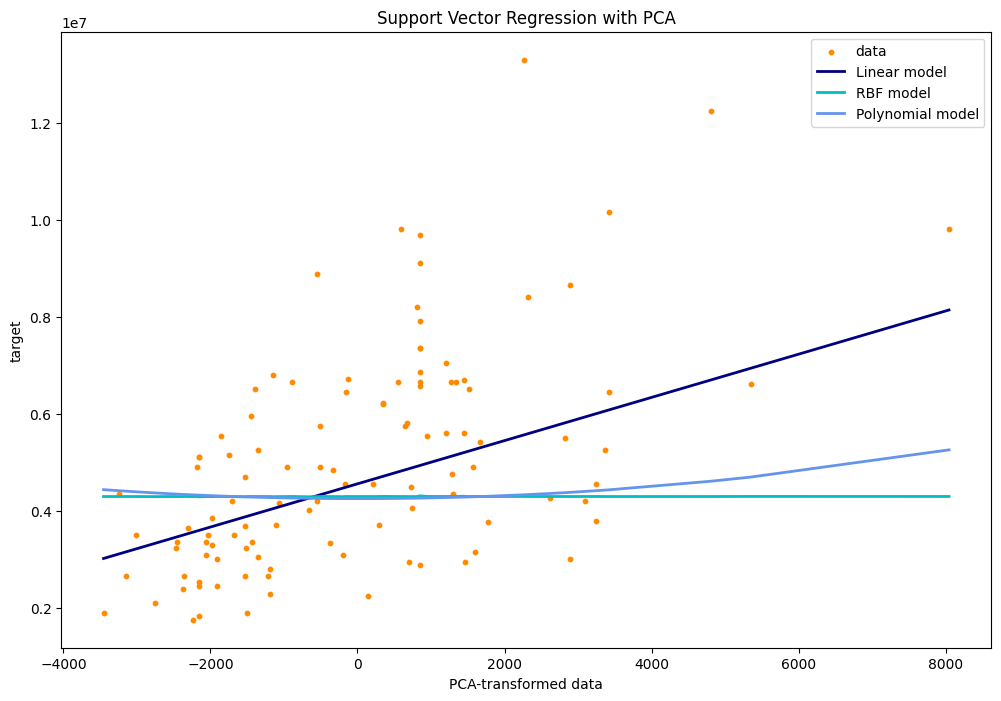

In [17]:
#PROBLEM 2 (USING PCA)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd

data = pd.DataFrame({
    'price': [13300000,	12250000,	12250000,	12215000,	11410000,	10850000,	10150000,	10150000,	9870000,	9800000,	9800000,	9681000,	9310000,	9240000,	9240000,	9100000,	9100000,	8960000,	8890000,	8855000,	8750000,	8680000,	8645000,	8645000,	8575000,	8540000,	8463000,	8400000,	8400000,	8400000,	8400000,	8400000,	8295000,	8190000,	8120000,	8080940,	8043000,	7980000,	7962500,	7910000,	7875000,	7840000,	7700000,	7700000,	7560000,	7560000,	7525000,	7490000,	7455000,	7420000,	7420000,	7420000,	7350000,	7350000,	7350000,	7350000,	7343000,	7245000,	7210000,	7210000,	7140000,	7070000,	7070000,	7035000,	7000000,	6930000,	6930000,	6895000,	6860000,	6790000,	6790000,	6755000,	6720000,	6685000,	6650000,	6650000,	6650000,	6650000,	6650000,	6650000,	6629000,	6615000,	6615000,	6580000,	6510000,	6510000,	6510000,	6475000,	6475000,	6440000,	6440000,	6419000,	6405000,	6300000,	6300000,	6300000,	6300000,	6300000,	6293000,	6265000,	6230000,	6230000,	6195000,	6195000,	6195000,	6160000,	6160000,	6125000,	6107500,	6090000,	6090000,	6090000,	6083000,	6083000,	6020000,	6020000,	6020000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5950000,	5943000,	5880000,	5880000,	5873000,	5873000,	5866000,	5810000,	5810000,	5810000,	5803000,	5775000,	5740000,	5740000,	5740000,	5740000,	5740000,	5652500,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5600000,	5565000,	5565000,	5530000,	5530000,	5530000,	5523000,	5495000,	5495000,	5460000,	5460000,	5460000,	5460000,	5425000,	5390000,	5383000,	5320000,	5285000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5250000,	5243000,	5229000,	5215000,	5215000,	5215000,	5145000,	5145000,	5110000,	5110000,	5110000,	5110000,	5075000,	5040000,	5040000,	5040000,	5040000,	5033000,	5005000,	4970000,	4970000,	4956000,	4935000,	4907000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4900000,	4893000,	4893000,	4865000,	4830000,	4830000,	4830000,	4830000,	4795000,	4795000,	4767000,	4760000,	4760000,	4760000,	4753000,	4690000,	4690000,	4690000,	4690000,	4690000,	4690000,	4655000,	4620000,	4620000,	4620000,	4620000,	4620000,	4613000,	4585000,	4585000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4550000,	4543000,	4543000,	4515000,	4515000,	4515000,	4515000,	4480000,	4480000,	4480000,	4480000,	4480000,	4473000,	4473000,	4473000,	4445000,	4410000,	4410000,	4403000,	4403000,	4403000,	4382000,	4375000,	4340000,	4340000,	4340000,	4340000,	4340000,	4319000,	4305000,	4305000,	4277000,	4270000,	4270000,	4270000,	4270000,	4270000,	4270000,	4235000,	4235000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4200000,	4193000,	4193000,	4165000,	4165000,	4165000,	4130000,	4130000,	4123000,	4098500,	4095000,	4095000,	4095000,	4060000,	4060000,	4060000,	4060000,	4060000,	4025000,	4025000,	4025000,	4007500,	4007500,	3990000,	3990000,	3990000,	3990000,	3990000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3920000,	3885000,	3885000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3850000,	3836000,	3815000,	3780000,	3780000,	3780000,	3780000,	3780000,	3780000,	3773000,	3773000,	3773000,	3745000,	3710000,	3710000,	3710000,	3710000,	3710000,	3703000,	3703000,	3675000,	3675000,	3675000,	3675000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3640000,	3633000,	3605000,	3605000,	3570000,	3570000,	3570000,	3570000,	3535000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3500000,	3493000,	3465000,	3465000,	3465000,	3430000,	3430000,	3430000,	3430000,	3430000,	3430000,	3423000,	3395000,	3395000,	3395000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3360000,	3353000,	3332000,	3325000,	3325000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3290000,	3255000,	3255000,	3234000,	3220000,	3220000,	3220000,	3220000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3150000,	3143000,	3129000,	3118850,	3115000,	3115000,	3115000,	3087000,	3080000,	3080000,	3080000,	3080000,	3045000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3010000,	3003000,	2975000,	2961000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2940000,	2870000,	2870000,	2870000,	2870000,	2852500,	2835000,	2835000,	2835000,	2800000,	2800000,	2730000,	2730000,	2695000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2660000,	2653000,	2653000,	2604000,	2590000,	2590000,	2590000,	2520000,	2520000,	2520000,	2485000,	2485000,	2450000,	2450000,	2450000,	2450000,	2450000,	2450000,	2408000,	2380000,	2380000,	2380000,	2345000,	2310000,	2275000,	2275000,	2275000,	2240000,	2233000,	2135000,	2100000,	2100000,	2100000,	1960000,	1890000,	1890000,	1855000,	1820000,	1767150,	1750000,	1750000,	1750000],
    'area': [7420,	8960,	9960,	7500,	7420,	7500,	8580,	16200,	8100,	5750,	13200,	6000,	6550,	3500,	7800,	6000,	6600,	8500,	4600,	6420,	4320,	7155,	8050,	4560,	8800,	6540,	6000,	8875,	7950,	5500,	7475,	7000,	4880,	5960,	6840,	7000,	7482,	9000,	6000,	6000,	6550,	6360,	6480,	6000,	6000,	6000,	6000,	6600,	4300,	7440,	7440,	6325,	6000,	5150,	6000,	6000,	11440,	9000,	7680,	6000,	6000,	8880,	6240,	6360,	11175,	8880,	13200,	7700,	6000,	12090,	4000,	6000,	5020,	6600,	4040,	4260,	6420,	6500,	5700,	6000,	6000,	4000,	10500,	6000,	3760,	8250,	6670,	3960,	7410,	8580,	5000,	6750,	4800,	7200,	6000,	4100,	9000,	6400,	6600,	6000,	6600,	5500,	5500,	6350,	5500,	4500,	5450,	6420,	3240,	6615,	6600,	8372,	4300,	9620,	6800,	8000,	6900,	3700,	6420,	7020,	6540,	7231,	6254,	7320,	6525,	15600,	7160,	6500,	5500,	11460,	4800,	5828,	5200,	4800,	7000,	6000,	5400,	4640,	5000,	6360,	5800,	6660,	10500,	4800,	4700,	5000,	10500,	5500,	6360,	6600,	5136,	4400,	5400,	3300,	3650,	6100,	6900,	2817,	7980,	3150,	6210,	6100,	6600,	6825,	6710,	6450,	7800,	4600,	4260,	6540,	5500,	10269,	8400,	5300,	3800,	9800,	8520,	6050,	7085,	3180,	4500,	7200,	3410,	7980,	3000,	3000,	11410,	6100,	5720,	3540,	7600,	10700,	6600,	4800,	8150,	4410,	7686,	2800,	5948,	4200,	4520,	4095,	4120,	5400,	4770,	6300,	5800,	3000,	2970,	6720,	4646,	12900,	3420,	4995,	4350,	4160,	6040,	6862,	4815,	7000,	8100,	3420,	9166,	6321,	10240,	6440,	5170,	6000,	3630,	9667,	5400,	4320,	3745,	4160,	3880,	5680,	2870,	5010,	4510,	4000,	3840,	3760,	3640,	2550,	5320,	5360,	3520,	8400,	4100,	4990,	3510,	3450,	9860,	3520,	4510,	5885,	4000,	8250,	4040,	6360,	3162,	3510,	3750,	3968,	4900,	2880,	4880,	4920,	4950,	3900,	4500,	1905,	4075,	3500,	6450,	4032,	4400,	10360,	3400,	6360,	6360,	4500,	2175,	4360,	7770,	6650,	2787,	5500,	5040,	5850,	2610,	2953,	2747,	4410,	4000,	2325,	4600,	3640,	5800,	7000,	4079,	3520,	2145,	4500,	8250,	3450,	4840,	4080,	4046,	4632,	5985,	6060,	3600,	3680,	4040,	5600,	5900,	4992,	4340,	3000,	4320,	3630,	3460,	5400,	4500,	3460,	4100,	6480,	4500,	3960,	4050,	7260,	5500,	3000,	3290,	3816,	8080,	2145,	3780,	3180,	5300,	3180,	7152,	4080,	3850,	2015,	2176,	3350,	3150,	4820,	3420,	3600,	5830,	2856,	8400,	8250,	2520,	6930,	3480,	3600,	4040,	6020,	4050,	3584,	3120,	5450,	3630,	3630,	5640,	3600,	4280,	3570,	3180,	3000,	3520,	5960,	4130,	2850,	2275,	3520,	4500,	4000,	3150,	4500,	4500,	3640,	3850,	4240,	3650,	4600,	2135,	3036,	3990,	7424,	3480,	3600,	3640,	5900,	3120,	7350,	3512,	9500,	5880,	12944,	4900,	3060,	5320,	2145,	4000,	3185,	3850,	2145,	2610,	1950,	4040,	4785,	3450,	3640,	3500,	4960,	4120,	4750,	3720,	3750,	3100,	3185,	2700,	2145,	4040,	4775,	2500,	3180,	6060,	3480,	3792,	4040,	2145,	5880,	4500,	3930,	3640,	4370,	2684,	4320,	3120,	3450,	3986,	3500,	4095,	1650,	3450,	6750,	9000,	3069,	4500,	5495,	2398,	3000,	3850,	3500,	8100,	4960,	2160,	3090,	4500,	3800,	3090,	3240,	2835,	4600,	5076,	3750,	3630,	8050,	4352,	3000,	5850,	4960,	3600,	3660,	3480,	2700,	3150,	6615,	3040,	3630,	6000,	5400,	5200,	3300,	4350,	2640,	2650,	3960,	6800,	4000,	4000,	3934,	2000,	3630,	2800,	2430,	3480,	4000,	3185,	4000,	2910,	3600,	4400,	3600,	2880,	3180,	3000,	4400,	3000,	3210,	3240,	3000,	3500,	4840,	7700,	3635,	2475,	2787,	3264,	3640,	3180,	1836,	3970,	3970,	1950,	5300,	3000,	2400,	3000,	3360,	3420,	1700,	3649,	2990,	3000,	2400,	3620,	2910,	3850],
    'bedrooms': [4,	4,	3,	4,	4,	3,	4,	5,	4,	3,	3,	4,	4,	4,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	5,	4,	3,	3,	4,	3,	5,	3,	3,	4,	3,	4,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	4,	4,	4,	3,	3,	2,	4,	4,	3,	3,	2,	3,	3,	4,	3,	4,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	5,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	3,	4,	3,	4,	4,	3,	3,	6,	3,	2,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	3,	3,	3,	3,	4,	3,	3,	3,	3,	4,	4,	3,	3,	3,	4,	4,	5,	4,	3,	2,	3,	3,	4,	3,	4,	5,	3,	3,	3,	3,	4,	3,	3,	4,	3,	4,	3,	3,	3,	3,	2,	4,	4,	3,	3,	3,	4,	3,	4,	3,	3,	3,	3,	4,	3,	3,	3,	3,	3,	2,	3,	2,	2,	4,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	2,	4,	3,	3,	2,	3,	3,	3,	3,	3,	4,	4,	2,	3,	3,	3,	2,	3,	4,	4,	2,	3,	2,	2,	3,	2,	3,	4,	2,	3,	3,	3,	3,	3,	2,	3,	4,	3,	3,	3,	3,	3,	3,	3,	3,	4,	2,	4,	3,	3,	3,	2,	4,	2,	3,	3,	3,	2,	3,	3,	2,	3,	2,	3,	3,	3,	4,	3,	3,	5,	3,	4,	4,	2,	2,	2,	3,	2,	2,	2,	3,	4,	2,	3,	3,	3,	3,	2,	4,	3,	4,	2,	4,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	4,	3,	2,	3,	3,	2,	2,	4,	3,	3,	4,	3,	3,	3,	3,	3,	4,	4,	3,	3,	3,	2,	3,	4,	3,	2,	2,	3,	4,	2,	4,	5,	2,	3,	2,	2,	3,	2,	3,	2,	3,	2,	2,	2,	3,	2,	3,	5,	4,	2,	3,	2,	3,	2,	2,	3,	2,	2,	2,	2,	2,	2,	3,	3,	2,	2,	3,	3,	3,	3,	3,	2,	2,	3,	4,	2,	2,	3,	3,	3,	4,	3,	3,	3,	3,	3,	6,	2,	2,	3,	2,	2,	3,	2,	3,	3,	3,	2,	3,	2,	2,	3,	3,	3,	3,	2,	3,	3,	2,	4,	4,	2,	2,	2,	3,	3,	2,	3,	3,	2,	4,	2,	4,	3,	4,	4,	2,	3,	3,	2,	2,	4,	3,	2,	3,	3,	1,	2,	2,	2,	3,	3,	2,	3,	2,	3,	3,	3,	3,	3,	2,	2,	2,	3,	2,	2,	2,	3,	3,	2,	2,	3,	3,	4,	2,	4,	2,	3,	2,	3,	4,	3,	2,	3,	3,	2,	2,	2,	4,	4,	3,	3,	2,	3,	3,	2,	3,	2,	2,	2,	3,	3,	3,	2,	3,	2,	3,	2,	2,	2,	2,	3,	3,	2,	3,	3,	3,	2,	2,	2,	2,	2,	2,	3,	4,	2,	2,	2,	2,	1,	3,	3,	3,	2,	3,	4,	2,	5,	3,	2,	2,	2,	3,	2,	3,	3],
    'bathrooms': [2,	4,	2,	2,	1,	3,	3,	3,	1,	2,	1,	3,	2,	2,	2,	1,	2,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	3,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	1,	2,	2,	2,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	1,	3,	1,	1,	2,	2,	2,	2,	1,	1,	2,	1,	2,	1,	2,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	2,	2,	2,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	2,	1,	1,	1,	3,	2,	2,	1,	2,	1,	2,	1,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	1,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	3,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	2,	1,	1,	1,	1,	1,	2,	1,	2,	2,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	3,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1],
    'stories': [3,	4,	2,	2,	2,	1,	4,	2,	2,	4,	2,	2,	2,	2,	2,	2,	2,	4,	2,	2,	2,	1,	1,	2,	2,	2,	4,	1,	2,	2,	4,	4,	2,	2,	2,	4,	3,	4,	4,	4,	2,	4,	4,	4,	4,	3,	4,	4,	2,	1,	4,	4,	4,	4,	2,	2,	2,	4,	4,	4,	2,	1,	2,	3,	1,	2,	1,	1,	1,	2,	2,	4,	4,	4,	2,	2,	3,	3,	1,	3,	2,	2,	1,	4,	2,	3,	3,	1,	1,	2,	2,	1,	4,	1,	4,	3,	1,	1,	3,	3,	1,	3,	4,	3,	1,	4,	1,	3,	3,	2,	1,	3,	2,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	4,	1,	1,	3,	3,	3,	1,	4,	3,	3,	1,	4,	2,	2,	3,	1,	4,	2,	2,	3,	2,	4,	1,	2,	3,	1,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	4,	3,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	2,	2,	2,	1,	2,	1,	1,	1,	2,	3,	1,	2,	1,	2,	1,	1,	3,	1,	2,	1,	2,	4,	2,	1,	2,	1,	1,	4,	1,	2,	2,	2,	1,	2,	1,	2,	2,	2,	2,	2,	2,	2,	1,	2,	2,	2,	2,	1,	4,	1,	2,	3,	2,	1,	2,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	3,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	2,	1,	1,	3,	2,	3,	1,	1,	2,	2,	2,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	3,	2,	2,	1,	1,	2,	2,	1,	2,	2,	2,	2,	1,	2,	2,	1,	1,	1,	1,	2,	2,	2,	1,	2,	1,	1,	2,	2,	2,	1,	2,	2,	1,	1,	3,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	2,	2,	2,	1,	2,	2,	2,	3,	1,	1,	1,	2,	2,	1,	1,	1,	2,	2,	2,	2,	2,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	2,	1,	1,	3,	1,	1,	1,	3,	2,	2,	1,	2,	1,	1,	2,	3,	2,	1,	1,	1,	2,	1,	1,	2,	1,	2,	1,	2,	1,	2,	2,	1,	2,	1,	1,	1,	2,	2,	1,	1,	2,	1,	1,	1,	1,	2,	2,	1,	2,	1,	2,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	1,	2,	2,	1,	1,	1,	2,	2,	1,	2,	2,	2,	1,	2,	2,	2,	1,	2,	2,	1,	1,	1,	2,	3,	2,	2,	1,	2,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	1,	2,	2,	2,	2,	1,	1,	1,	2,	1,	1,	2,	2,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	2,	1,	2,	2,	1,	1,	1,	1,	1,	1,	2],
    'parking': [2,	3,	2,	3,	2,	2,	2,	0,	2,	1,	2,	2,	1,	2,	0,	2,	1,	2,	2,	1,	2,	2,	1,	1,	2,	2,	0,	1,	2,	1,	2,	2,	1,	1,	1,	2,	1,	2,	2,	1,	0,	0,	2,	2,	1,	0,	1,	3,	1,	0,	1,	1,	1,	2,	1,	1,	1,	1,	1,	1,	1,	1,	1,	2,	1,	1,	1,	2,	1,	2,	0,	0,	0,	0,	1,	0,	0,	0,	2,	0,	1,	1,	1,	0,	2,	0,	0,	2,	2,	2,	0,	2,	0,	3,	1,	2,	1,	1,	0,	0,	0,	1,	1,	0,	2,	0,	0,	0,	1,	1,	2,	2,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	1,	0,	1,	2,	2,	0,	1,	2,	0,	0,	0,	0,	2,	0,	2,	1,	0,	2,	0,	1,	1,	0,	1,	0,	1,	1,	0,	0,	0,	2,	0,	0,	2,	2,	0,	1,	2,	0,	0,	0,	0,	0,	1,	0,	2,	2,	0,	0,	0,	1,	2,	0,	1,	2,	2,	0,	2,	2,	2,	1,	0,	1,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	2,	0,	1,	0,	1,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	2,	2,	2,	0,	0,	0,	2,	2,	0,	0,	2,	0,	2,	1,	2,	3,	0,	1,	2,	1,	0,	0,	0,	0,	2,	1,	0,	0,	0,	1,	1,	2,	0,	0,	0,	2,	0,	3,	0,	0,	0,	1,	0,	0,	2,	1,	2,	0,	1,	1,	1,	0,	0,	0,	0,	0,	2,	1,	0,	0,	1,	0,	2,	2,	0,	0,	1,	1,	2,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	2,	0,	0,	0,	1,	0,	0,	1,	0,	2,	3,	0,	0,	1,	0,	3,	1,	1,	2,	1,	0,	0,	1,	0,	0,	1,	0,	1,	2,	0,	2,	2,	2,	1,	3,	0,	0,	0,	1,	0,	0,	0,	3,	0,	0,	1,	2,	2,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	2,	0,	1,	2,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	2,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	3,	0,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	0,	1,	2,	0,	2,	0,	0,	0,	0,	0,	0,	2,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	2,	0,	0,	0,	2,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	2,	0,	0,	0,	0,	3,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	2,	0,	0,	0,	0],
    'mainroad': [1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1],
    'guestroom': [0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'basement': [0,	0,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0],
    'hotwaterheating': [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'aircondition': [1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	0,	1,	0,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	1,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    'prefarea': [1,	0,	1,	1,	0,	1,	1,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    })
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'aircondition', 'prefarea']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit PCA on the training data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create SVR models with different kernels
svr_linear_pca = SVR(kernel='linear', C=1e3)
svr_rbf_pca = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_poly_pca = SVR(kernel='poly', C=1e3, degree=2)

# Fit SVR models on the PCA-transformed training data
svr_linear_pca.fit(X_train_pca, y_train)
svr_rbf_pca.fit(X_train_pca, y_train)
svr_poly_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
y_linear_pred_pca = svr_linear_pca.predict(X_test_pca)
y_rbf_pred_pca = svr_rbf_pca.predict(X_test_pca)
y_poly_pred_pca = svr_poly_pca.predict(X_test_pca)

# Evaluate the models using Mean Squared Error
mse_linear_pca = mean_squared_error(y_test, y_linear_pred_pca)
mse_rbf_pca = mean_squared_error(y_test, y_rbf_pred_pca)
mse_poly_pca = mean_squared_error(y_test, y_poly_pred_pca)

print("MSE (Linear Kernel with PCA):", mse_linear_pca)
print("MSE (RBF Kernel with PCA):", mse_rbf_pca)
print("MSE (Poly Kernel with PCA):", mse_poly_pca)

# Sort the PCA-transformed 'X_test' values
sorted_indices = X_test_pca[:, 0].argsort()
sorted_X_test_pca = X_test_pca[sorted_indices]
sorted_y_test = y_test.iloc[sorted_indices]

# Compute model predictions on the sorted PCA-transformed 'X_test'
sorted_y_linear_pred_pca = svr_linear_pca.predict(sorted_X_test_pca)
sorted_y_rbf_pred_pca = svr_rbf_pca.predict(sorted_X_test_pca)
sorted_y_poly_pred_pca = svr_poly_pca.predict(sorted_X_test_pca)

# Create a plot to visualize the actual vs. predicted values for PCA-transformed 'X_test'
plt.figure(figsize=(12, 8))
plt.scatter(X_test_pca, y_test, color='darkorange', label='data', s=10)
plt.plot(sorted_X_test_pca, sorted_y_linear_pred_pca, color='navy', label='Linear model', linewidth=2)
plt.plot(sorted_X_test_pca, sorted_y_rbf_pred_pca, color='c', label='RBF model', linewidth=2)
plt.plot(sorted_X_test_pca, sorted_y_poly_pred_pca, color='cornflowerblue', label='Polynomial model', linewidth=2)
plt.xlabel('PCA-transformed data')
plt.ylabel('target')
plt.title('Support Vector Regression with PCA')
plt.legend()
plt.show()
